In [300]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

READ THE DATA

In [301]:
df = pd.read_csv("covid.csv", index_col = [0])

In [302]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566602 entries, 16169f to 0021c9
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   sex                  566602 non-null  int64 
 1   patient_type         566602 non-null  int64 
 2   entry_date           566602 non-null  object
 3   date_symptoms        566602 non-null  object
 4   date_died            566602 non-null  object
 5   intubed              566602 non-null  int64 
 6   pneumonia            566602 non-null  int64 
 7   age                  566602 non-null  int64 
 8   pregnancy            566602 non-null  int64 
 9   diabetes             566602 non-null  int64 
 10  copd                 566602 non-null  int64 
 11  asthma               566602 non-null  int64 
 12  inmsupr              566602 non-null  int64 
 13  hypertension         566602 non-null  int64 
 14  other_disease        566602 non-null  int64 
 15  cardiovascular       566602 non-nu

In [303]:
#columns
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [304]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,1,97
1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,...,2,2,2,2,2,2,2,99,1,97
167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,...,2,2,2,2,1,2,2,99,1,2
0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,...,2,2,2,2,2,2,2,99,1,2
0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,...,2,1,2,1,2,2,2,99,1,2


REPLACE

In [305]:
df.sex.unique()

array([2, 1], dtype=int64)

In [306]:
df.sex.replace({1:"female", 2:"male"}, inplace = True)

In [307]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [308]:
#patient type
df.patient_type.unique()

array([1, 2], dtype=int64)

In [309]:
#Patient type
df.patient_type.replace({1:"not hospitalized", 2: "hospitalized"}, inplace = True)

In [310]:
df.patient_type.unique()

array(['not hospitalized', 'hospitalized'], dtype=object)

In [311]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

_disease replacement

In [312]:
diseases = ['intubed','pneumonia', 'pregnancy', 'copd', 'asthma', 'inmsupr', 'hypertension','other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'icu' ]

In [313]:
diseases


['intubed',
 'pneumonia',
 'pregnancy',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'contact_other_covid',
 'icu']

In [314]:
for col in diseases:
    print(col)

intubed
pneumonia
pregnancy
copd
asthma
inmsupr
hypertension
other_disease
cardiovascular
obesity
renal_chronic
tobacco
contact_other_covid
icu


In [315]:
for col in diseases:
    df[col].replace({1:"yes", 2: "no", 97:"NaN", 98: "NaN", 99:"NaN"}, inplace = True)

In [316]:
df

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
16169f,male,not hospitalized,04-05-2020,02-05-2020,9999-99-99,NaN,no,27,NaN,2,...,no,no,no,no,no,no,no,no,1,NaN
1009bf,male,not hospitalized,19-03-2020,17-03-2020,9999-99-99,NaN,no,24,NaN,2,...,no,no,no,no,no,no,no,NaN,1,NaN
167386,female,hospitalized,06-04-2020,01-04-2020,9999-99-99,no,no,54,no,2,...,no,no,no,no,yes,no,no,NaN,1,no
0b5948,male,hospitalized,17-04-2020,10-04-2020,9999-99-99,no,yes,30,NaN,2,...,no,no,no,no,no,no,no,NaN,1,no
0d01b5,female,hospitalized,13-04-2020,13-04-2020,22-04-2020,no,no,60,no,1,...,no,yes,no,yes,no,no,no,NaN,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01ff60,male,not hospitalized,13-05-2020,03-05-2020,9999-99-99,NaN,no,58,NaN,1,...,no,no,no,no,no,no,no,no,3,NaN
047cd1,female,not hospitalized,07-04-2020,06-04-2020,9999-99-99,NaN,no,48,no,2,...,no,no,no,no,no,no,no,no,3,NaN
1beb81,female,hospitalized,14-05-2020,01-05-2020,9999-99-99,no,yes,49,no,2,...,no,no,no,no,yes,no,no,NaN,3,no


In [317]:
df.icu.unique()

array(['NaN', 'no', 'yes'], dtype=object)

In [318]:
df.icu.replace({1:"yes", 2: "no", 97:"NaN", 98: "NaN", 99:"NaN"})

id
16169f    NaN
1009bf    NaN
167386     no
0b5948     no
0d01b5     no
         ... 
01ff60    NaN
047cd1    NaN
1beb81     no
16fb02    NaN
0021c9    NaN
Name: icu, Length: 566602, dtype: object

In [319]:
df

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
16169f,male,not hospitalized,04-05-2020,02-05-2020,9999-99-99,NaN,no,27,NaN,2,...,no,no,no,no,no,no,no,no,1,NaN
1009bf,male,not hospitalized,19-03-2020,17-03-2020,9999-99-99,NaN,no,24,NaN,2,...,no,no,no,no,no,no,no,NaN,1,NaN
167386,female,hospitalized,06-04-2020,01-04-2020,9999-99-99,no,no,54,no,2,...,no,no,no,no,yes,no,no,NaN,1,no
0b5948,male,hospitalized,17-04-2020,10-04-2020,9999-99-99,no,yes,30,NaN,2,...,no,no,no,no,no,no,no,NaN,1,no
0d01b5,female,hospitalized,13-04-2020,13-04-2020,22-04-2020,no,no,60,no,1,...,no,yes,no,yes,no,no,no,NaN,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01ff60,male,not hospitalized,13-05-2020,03-05-2020,9999-99-99,NaN,no,58,NaN,1,...,no,no,no,no,no,no,no,no,3,NaN
047cd1,female,not hospitalized,07-04-2020,06-04-2020,9999-99-99,NaN,no,48,no,2,...,no,no,no,no,no,no,no,no,3,NaN
1beb81,female,hospitalized,14-05-2020,01-05-2020,9999-99-99,no,yes,49,no,2,...,no,no,no,no,yes,no,no,NaN,3,no


In [320]:
df.tail()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
01ff60,male,not hospitalized,13-05-2020,03-05-2020,9999-99-99,NaN,no,58,NaN,1,...,no,no,no,no,no,no,no,no,3,NaN
047cd1,female,not hospitalized,07-04-2020,06-04-2020,9999-99-99,NaN,no,48,no,2,...,no,no,no,no,no,no,no,no,3,NaN
1beb81,female,hospitalized,14-05-2020,01-05-2020,9999-99-99,no,yes,49,no,2,...,no,no,no,no,yes,no,no,NaN,3,no
16fb02,female,not hospitalized,31-05-2020,29-05-2020,9999-99-99,NaN,yes,43,no,2,...,no,no,no,no,no,no,no,no,3,NaN
0021c9,male,not hospitalized,16-05-2020,16-05-2020,9999-99-99,NaN,yes,65,NaN,1,...,no,yes,no,no,yes,no,no,no,3,NaN


In [321]:
#Covid result
df.covid_res

id
16169f    1
1009bf    1
167386    1
0b5948    1
0d01b5    1
         ..
01ff60    3
047cd1    3
1beb81    3
16fb02    3
0021c9    3
Name: covid_res, Length: 566602, dtype: int64

In [322]:
df["covid_res"].replace({1: "positive", 2:"negative", 3:"awaiting"}, inplace = True)

In [323]:
df.tail(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
16fb02,female,not hospitalized,31-05-2020,29-05-2020,9999-99-99,NaN,yes,43,no,2,...,no,no,no,no,no,no,no,no,awaiting,NaN
0021c9,male,not hospitalized,16-05-2020,16-05-2020,9999-99-99,NaN,yes,65,NaN,1,...,no,yes,no,no,yes,no,no,no,awaiting,NaN


In [324]:
np.nan

nan

date

In [325]:
df["entry_date"] = pd.to_datetime(df.entry_date)

In [326]:
df["date_symptoms"] = pd.to_datetime(df.date_symptoms)

In [327]:
df["date_died"].replace("9999-99-99", np.nan, inplace = True)

In [328]:
df["date_died"] = pd.to_datetime(df.date_died)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566602 entries, 16169f to 0021c9
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   sex                  566602 non-null  object        
 1   patient_type         566602 non-null  object        
 2   entry_date           566602 non-null  datetime64[ns]
 3   date_symptoms        566602 non-null  datetime64[ns]
 4   date_died            36176 non-null   datetime64[ns]
 5   intubed              566602 non-null  object        
 6   pneumonia            566602 non-null  object        
 7   age                  566602 non-null  int64         
 8   pregnancy            566602 non-null  object        
 9   diabetes             566602 non-null  int64         
 10  copd                 566602 non-null  object        
 11  asthma               566602 non-null  object        
 12  inmsupr              566602 non-null  object        
 13  hypertension  

In [330]:
df.isna().sum()

sex                         0
patient_type                0
entry_date                  0
date_symptoms               0
date_died              530426
intubed                     0
pneumonia                   0
age                         0
pregnancy                   0
diabetes                    0
copd                        0
asthma                      0
inmsupr                     0
hypertension                0
other_disease               0
cardiovascular              0
obesity                     0
renal_chronic               0
tobacco                     0
contact_other_covid         0
covid_res                   0
icu                         0
dtype: int64

In [331]:
df.duplicated().sum()

93858

In [332]:
df.shape

(566602, 22)

In [333]:
df.drop_duplicates(inplace=True)

### EDA

In [334]:
#frequency of unique labels
df["covid_res"].value_counts()

negative    219330
positive    196516
awaiting     56898
Name: covid_res, dtype: int64

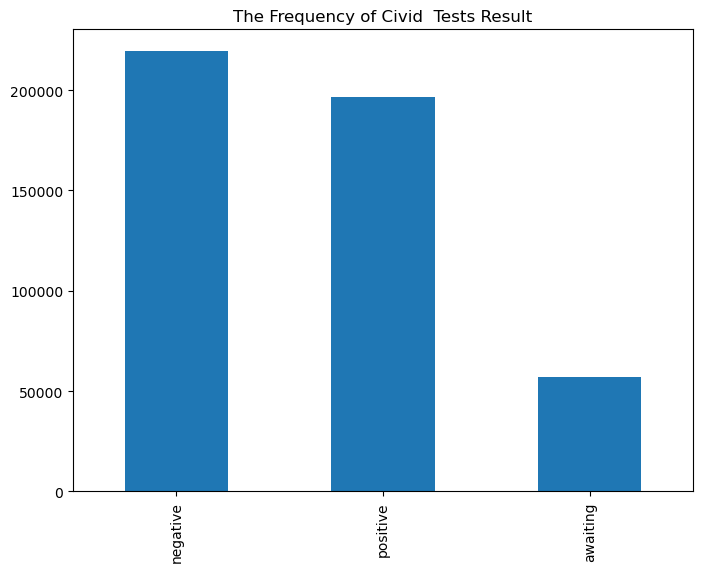

In [335]:
plt.figure(figsize=(8,6))
df["covid_res"].value_counts().plot(kind = "bar")
plt.title("The Frequency of Civid  Tests Result")
plt.show()

In [336]:
sex_frequency = df["sex"].value_counts()
sex_frequency

male      244075
female    228669
Name: sex, dtype: int64

In [337]:
sex_frequency.index

Index(['male', 'female'], dtype='object')

In [338]:
sex_frequency.values

array([244075, 228669], dtype=int64)

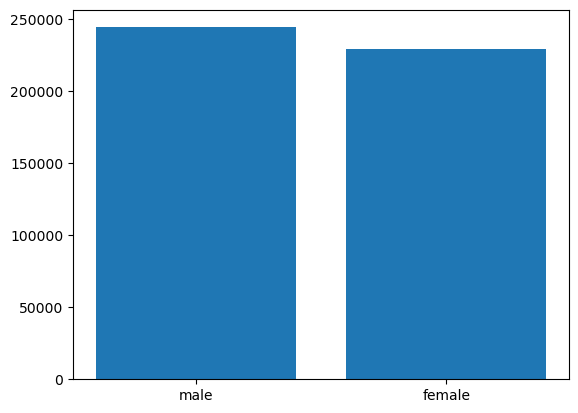

In [339]:
plt.bar(sex_frequency.index,sex_frequency.values)
plt.show()

<AxesSubplot:xlabel='covid_res', ylabel='count'>

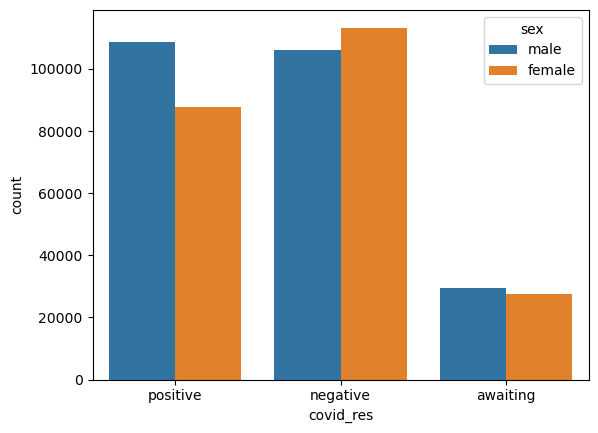

In [340]:
sns.countplot(data = df, x = "covid_res", hue = "sex")

In [341]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

<AxesSubplot:xlabel='tobacco', ylabel='count'>

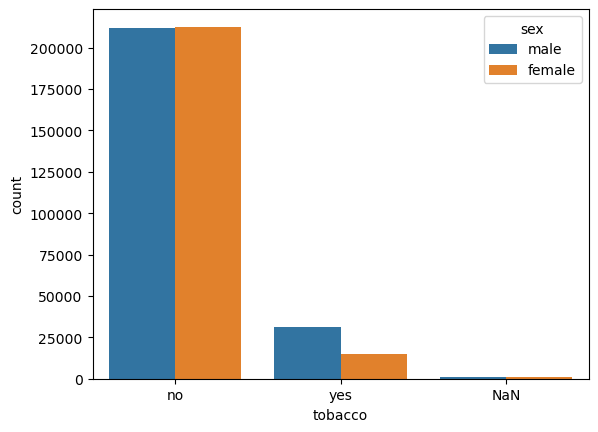

In [342]:
sns.countplot(data = df, x = "tobacco", hue = "sex")

__filter --> tobacco = Yes__

In [343]:
smoking_df = df[df.tobacco == "yes"]

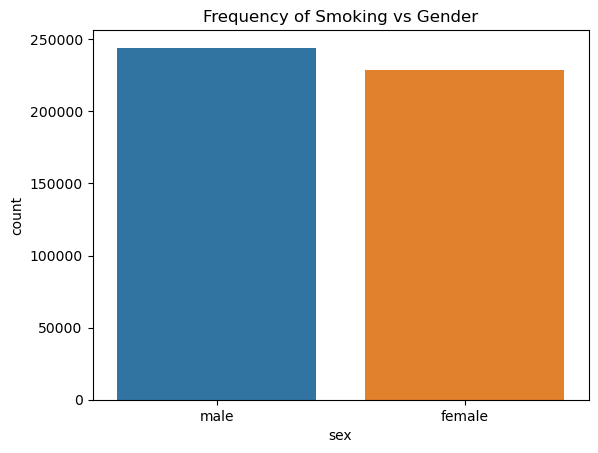

In [344]:
sns.countplot(data = df, x ="sex")
plt.title("Frequency of Smoking vs Gender")
plt.show()

In [345]:
df.asthma.value_counts()

no     453121
yes     17894
NaN      1729
Name: asthma, dtype: int64

__Filter out NaN from Asthma__

In [346]:
#write a codition to exclude NaN
asthma = df.asthma[df.asthma != "NaN"]

In [347]:
asthma.value_counts(normalize = True)

no     0.96201
yes    0.03799
Name: asthma, dtype: float64

In [348]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

__age__

In [349]:
df.age

id
16169f    27
1009bf    24
167386    54
0b5948    30
0d01b5    60
          ..
01ff60    58
047cd1    48
1beb81    49
16fb02    43
0021c9    65
Name: age, Length: 472744, dtype: int64

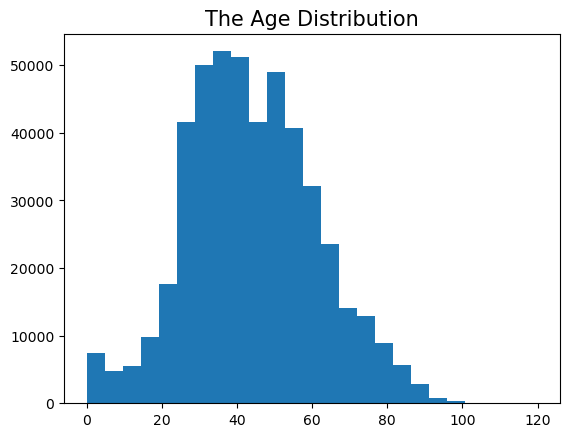

In [350]:
plt.hist(df.age, bins = 25)
plt.title("The Age Distribution", fontsize = 15)
plt.show()

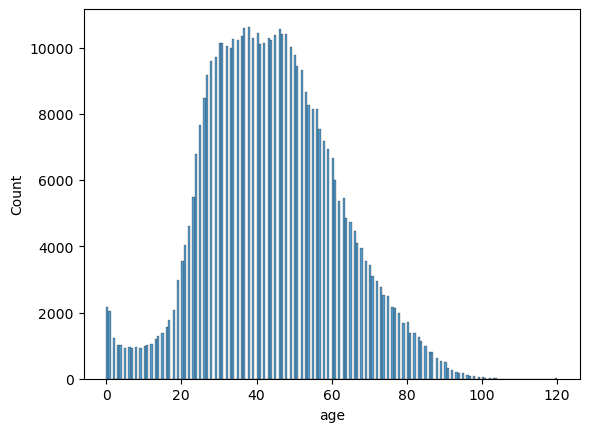

In [351]:
sns.histplot(df.age)
plt.show()

In [352]:
df.covid_res

id
16169f    positive
1009bf    positive
167386    positive
0b5948    positive
0d01b5    positive
            ...   
01ff60    awaiting
047cd1    awaiting
1beb81    awaiting
16fb02    awaiting
0021c9    awaiting
Name: covid_res, Length: 472744, dtype: object

In [353]:
df.age

id
16169f    27
1009bf    24
167386    54
0b5948    30
0d01b5    60
          ..
01ff60    58
047cd1    48
1beb81    49
16fb02    43
0021c9    65
Name: age, Length: 472744, dtype: int64

In [354]:
df.covid_res

id
16169f    positive
1009bf    positive
167386    positive
0b5948    positive
0d01b5    positive
            ...   
01ff60    awaiting
047cd1    awaiting
1beb81    awaiting
16fb02    awaiting
0021c9    awaiting
Name: covid_res, Length: 472744, dtype: object

In [355]:
df

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
16169f,male,not hospitalized,2020-04-05,2020-02-05,NaT,NaN,no,27,NaN,2,...,no,no,no,no,no,no,no,no,positive,NaN
1009bf,male,not hospitalized,2020-03-19,2020-03-17,NaT,NaN,no,24,NaN,2,...,no,no,no,no,no,no,no,NaN,positive,NaN
167386,female,hospitalized,2020-06-04,2020-01-04,NaT,no,no,54,no,2,...,no,no,no,no,yes,no,no,NaN,positive,no
0b5948,male,hospitalized,2020-04-17,2020-10-04,NaT,no,yes,30,NaN,2,...,no,no,no,no,no,no,no,NaN,positive,no
0d01b5,female,hospitalized,2020-04-13,2020-04-13,2020-04-22,no,no,60,no,1,...,no,yes,no,yes,no,no,no,NaN,positive,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01ff60,male,not hospitalized,2020-05-13,2020-03-05,NaT,NaN,no,58,NaN,1,...,no,no,no,no,no,no,no,no,awaiting,NaN
047cd1,female,not hospitalized,2020-07-04,2020-06-04,NaT,NaN,no,48,no,2,...,no,no,no,no,no,no,no,no,awaiting,NaN
1beb81,female,hospitalized,2020-05-14,2020-01-05,NaT,no,yes,49,no,2,...,no,no,no,no,yes,no,no,NaN,awaiting,no


In [360]:
age = df.age

In [361]:
covid_res = df.covid_res

ValueError: cannot reindex on an axis with duplicate labels

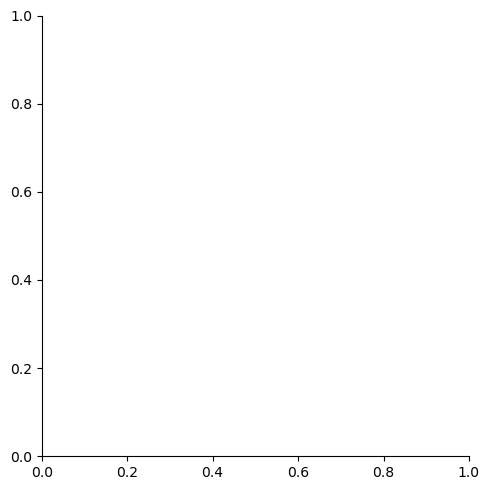

In [362]:
g = sns.displot(data=df, x ='age', hue ='covid_res')

In [358]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

__Percentage Covid Patients Intubated__